# Regression

Data from here <href>https://www.kaggle.com/uciml/adult-census-income</href>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [31]:
df_original = pd.read_csv('adult.csv')

Let's do the same cleaning as in Module 9

In [32]:
df = df_original.replace('?', np.NaN)
df = pd.get_dummies(data=df,columns=['workclass','marital.status','occupation',\
                                     'relationship','race','sex', 'native.country'])
df.drop(['education'],axis=1,inplace=True)
df.income = df.apply(lambda row : 1.0 if row['income'].startswith('>') else 0.0, axis=1)

In [33]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Make <i>X</i> and <i>Y</i>
We want to explain (or predict) "age". We need to remove some attributes that are obviously correlated to age, such as some marital.status values.

In [34]:
X = df.drop('age',axis=1)
# remove some attributes that are clearly correlated with age
#X = X.drop(['marital.status_Widowed'],axis=1)
#X = X.drop(['marital.status_Never-married'],axis=1)
X = X.drop(['marital.status_Never-married','marital.status_Widowed'],axis=1)

Y = df.age

# Regression for Data Exploration

## Lasso

Lasso will try to minimize the number of attributes used for the prediction, which gives us insights about which attributes are most important.

In [35]:
from sklearn import linear_model
regLasso = linear_model.Lasso()

In [36]:
regLasso.fit(X,Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Explore relevant attributes

In [37]:
regLasso.coef_

array([-9.18312030e-06, -0.00000000e+00,  1.12715197e-04,  1.41557615e-03,
       -3.97741517e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.71270183e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.20029169e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.94140219e+00, -0.00000000e+00, -0.00000000e+00,
       -7.18888014e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [9]:
regLasso.coef_

array([-9.18312030e-06, -0.00000000e+00,  1.12715197e-04,  1.41557615e-03,
       -3.97741517e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -3.71270183e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.20029169e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.94140219e+00, -0.00000000e+00, -0.00000000e+00,
       -7.18888014e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [10]:
{X.columns[i] : regLasso.coef_[i] for i in range(0,len(X.columns))}

{'fnlwgt': -9.183120297571753e-06,
 'education.num': -0.0,
 'capital.gain': 0.00011271519683205264,
 'capital.loss': 0.0014155761535710543,
 'hours.per.week': -0.003977415172271192,
 'income': 0.0,
 'workclass_Federal-gov': 0.0,
 'workclass_Local-gov': 0.0,
 'workclass_Never-worked': -0.0,
 'workclass_Private': -0.3712701828227211,
 'workclass_Self-emp-inc': 0.0,
 'workclass_Self-emp-not-inc': 0.0,
 'workclass_State-gov': 0.0,
 'workclass_Without-pay': 0.0,
 'marital.status_Divorced': 0.0,
 'marital.status_Married-AF-spouse': -0.0,
 'marital.status_Married-civ-spouse': 0.6200291687309228,
 'marital.status_Married-spouse-absent': 0.0,
 'marital.status_Separated': 0.0,
 'occupation_Adm-clerical': -0.0,
 'occupation_Armed-Forces': -0.0,
 'occupation_Craft-repair': -0.0,
 'occupation_Exec-managerial': 0.0,
 'occupation_Farming-fishing': 0.0,
 'occupation_Handlers-cleaners': -0.0,
 'occupation_Machine-op-inspct': -0.0,
 'occupation_Other-service': -0.0,
 'occupation_Priv-house-serv': 0.0,
 

In [11]:
pd.Series({X.columns[i] : regLasso.coef_[i] \
               for i in range(0,len(X.columns))} )

fnlwgt                                      -0.000009
education.num                               -0.000000
capital.gain                                 0.000113
capital.loss                                 0.001416
hours.per.week                              -0.003977
income                                       0.000000
workclass_Federal-gov                        0.000000
workclass_Local-gov                          0.000000
workclass_Never-worked                      -0.000000
workclass_Private                           -0.371270
workclass_Self-emp-inc                       0.000000
workclass_Self-emp-not-inc                   0.000000
workclass_State-gov                          0.000000
workclass_Without-pay                        0.000000
marital.status_Divorced                      0.000000
marital.status_Married-AF-spouse            -0.000000
marital.status_Married-civ-spouse            0.620029
marital.status_Married-spouse-absent         0.000000
marital.status_Separated    

In [12]:
s = pd.Series({X.columns[i] : regLasso.coef_[i]
               for i in range(0,len(X.columns))} )

In [13]:
s[s != 0]

fnlwgt                              -0.000009
capital.gain                         0.000113
capital.loss                         0.001416
hours.per.week                      -0.003977
workclass_Private                   -0.371270
marital.status_Married-civ-spouse    0.620029
relationship_Husband                 1.941402
relationship_Own-child              -7.188880
dtype: float64

## Decision Tree Regressor

Decision tree regressors predict one fixed value depending on the leaf reached by the object.

Build and train

In [38]:
import sklearn.tree

In [39]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

In [40]:
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Visualize the tree

In [41]:
Y.mean()

38.58164675532078

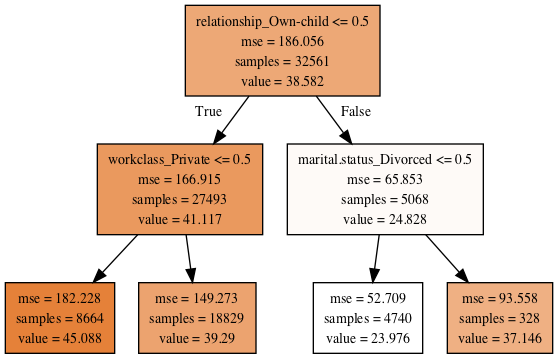

In [42]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# Regression for Prediction

Let's split X and Y into training and test

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                    test_size=.3,random_state=0)

Train and predict with Lasso

In [45]:
regLasso = linear_model.Lasso()

In [46]:
regLasso.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
y_pred = regLasso.predict(X_test)

In [48]:
y_pred

array([37.49469067, 30.80612447, 38.93558124, ..., 31.85294326,
       38.66887771, 41.7979302 ])

## Metrics

### Mean absolute error / Mean Absolute Deviation (MAD)

The average of the absolute values of the errors

In [49]:
y_pred

array([37.49469067, 30.80612447, 38.93558124, ..., 31.85294326,
       38.66887771, 41.7979302 ])

In [50]:
(y_pred - Y_test).abs().mean()

10.052039163469042

#### Mean squared error / MSE

The average of the errors squared

In [26]:
((y_pred - Y_test)**2).mean()

151.56218141236985

## Find the best regressors

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

regs = [LinearRegression(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor(), MLPRegressor()]#, SVR()]
 

Find the predictor that minimizes the cross-validated MAD.

In [52]:
from sklearn.model_selection import KFold

In [53]:
minMAD = 10000000
for reg in regs:
    kf = KFold(random_state=0,shuffle=True)
    mad = sklearn.model_selection.cross_val_score(reg,X,Y,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    if mad < minMAD:
        minMAD = mad
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))
        

LinearRegression(copy_X=T with mad= -8.869293460066972
ElasticNet(alpha=1.0, cop with mad= -10.397926945321737
DecisionTreeRegressor(cri with mad= -10.919194928311827
GradientBoostingRegressor with mad= -8.373979247226487
MLPRegressor(activation=' with mad= -14.951415219129581
***********************************************
Best Regressor is... MLPRegressor(activation='
**********************
With MAD Score -14.951415219129581


**Tech Note** The scoring='neg_mean_absolute_error' option should be read as 'more negative value has better result'. But this is very confusing. Refer to github discussion: https://github.com/scikit-learn/scikit-learn/issues/2439